Time Series forecasting
This project will let you practice your new skills on dealing with time series forecasting, by creating a cpu usage anomaly detection model.

Step 1:

In Machine Learning ARIMA model is generally a class of statistical models that give outputs which are linearly dependent on their previous values in the combination of stochastic factors.

We need to visualize the data to analyse the trends, seasonalities, and cycles.

We'll start by importing necessary libraries.

In [6]:
!pip install fbprophet
!pip install prophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [50 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib
      creating build/lib/fbprophet
      creating build/lib/fbprophet/stan_model
      Importing plotly failed. Interactive plots will not work.
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-chjsdva3/fbprophet_10df209a30f74f44a6521cbb1bf9466a/setup.py", line 122, in <module>
          setup(
        File "/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/setuptools/__init__.py", line 87, in setup
          return distutils.core.setup(**attrs)
        File "/home/gitpod/.pyenv/versions/3.8.13/lib/python3.

In [17]:
!pip install pystan==2.19.1.1 prophet
!pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 28.4 MB/s eta 0:00:00m eta 0:00:010:01:01
  Using cached cmdstanpy-1.0.4-py3-none-any.whl (73 kB)
  Attempting uninstall: pystan
    Found existing installation: pystan 3.5.0
    Uninstalling pystan-3.5.0:
      Successfully uninstalled pystan-3.5.0
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [35]:
!pip install chart_studio cufflinks statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 109.2 MB/s eta 0:00:00m eta 0:00:01:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 kB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 41.9 MB/s eta 0:00:00m eta 0:00:010:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11431 sha256=af58cac9733983d3d6b1a2cb5956652e3c8e0976c05405858f07af9ae27ba5d6
  Stored in directory: /home/gitpod/.cache/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [19]:
#python -m pip install prophet
#pip install --upgrade plotly

#Import libraries
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [36]:
import cufflinks as cf
import plotly.offline as py
import matplotlib.pyplot as plt

Step 2:

Load the datasets.

In [103]:
#Load data train and test A
data_train_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-a.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_test_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-a.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_train_a.head()


cpu
datetime                 
2017-01-27 18:42:00  1.14
2017-01-27 18:43:00  1.10
2017-01-27 18:44:00  1.09
2017-01-27 18:45:00  1.08
2017-01-27 18:46:00  1.08

In [104]:
#Load data train and test b
data_train_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-b.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_test_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-b.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_train_b.head()


cpu
datetime                 
2017-01-27 18:42:00  1.14
2017-01-27 18:43:00  1.10
2017-01-27 18:44:00  1.09
2017-01-27 18:45:00  1.08
2017-01-27 18:46:00  1.08

In [48]:
data_test_a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2017-01-28 01:42:00 to 2017-01-28 02:41:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cpu     60 non-null     float64
dtypes: float64(1)
memory usage: 960.0 bytes


Our index is actually just a list of strings that look like a date so we need to adjust these to be timestamps, that way our forecasting analysis will be able to interpret these values.

In [105]:
data_train_a.index = pd.to_datetime(data_train_a.index)

In [106]:
data_train_b.index = pd.to_datetime(data_train_b.index)

It’s often useful to be able to fill your missing data with realistic values such as the average of a time period, but always remember that if you are working with a time series problem and want your data to be realistic, you should not do a backfill of your data.

When working with time series data, you may come across time values that are in Unix time. Unix time, also called Epoch time is the number of seconds that have elapsed since 00:00:00 Coordinated Universal Time (UTC), Thursday, 1 January 1970.

How to convert epoch time to real time?

In [107]:
epoch_t = 1529272655
real_t = pd.to_datetime(epoch_t, unit='s')
real_t

Timestamp('2018-06-17 21:57:35')

In [108]:
real_t.tz_localize('UTC').tz_convert('US/Pacific')

Timestamp('2018-06-17 14:57:35-0700', tz='US/Pacific')

Step 3:

Using matplotlib visualize the data.

In [58]:
data_train_a.columns = ['CPU']

In [64]:
data_train_b.columns = ['CPU']

In [59]:
!pip install chart_studio cufflinks statsmodels


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


<AxesSubplot:title={'center':'CPU - DATE'}, xlabel='datetime'>

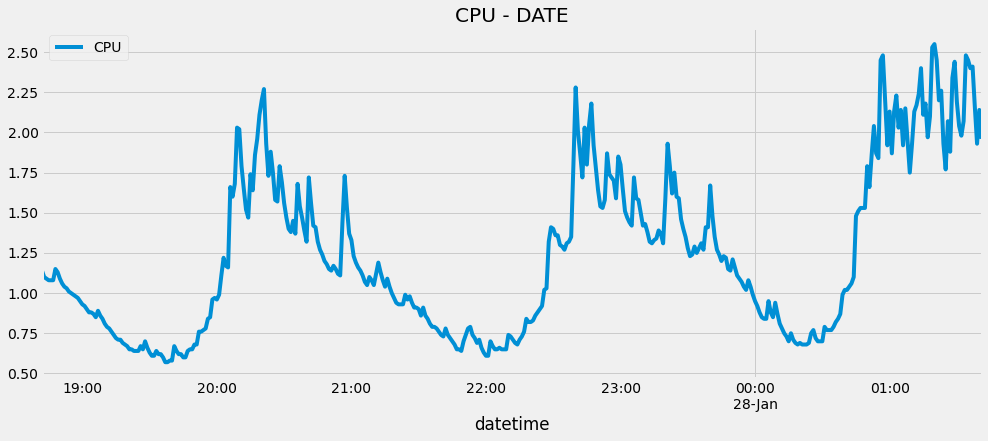

In [63]:
data_train_a.plot(title="CPU - DATE", figsize=(15,6))

<AxesSubplot:title={'center':'CPU - DATE'}, xlabel='datetime'>

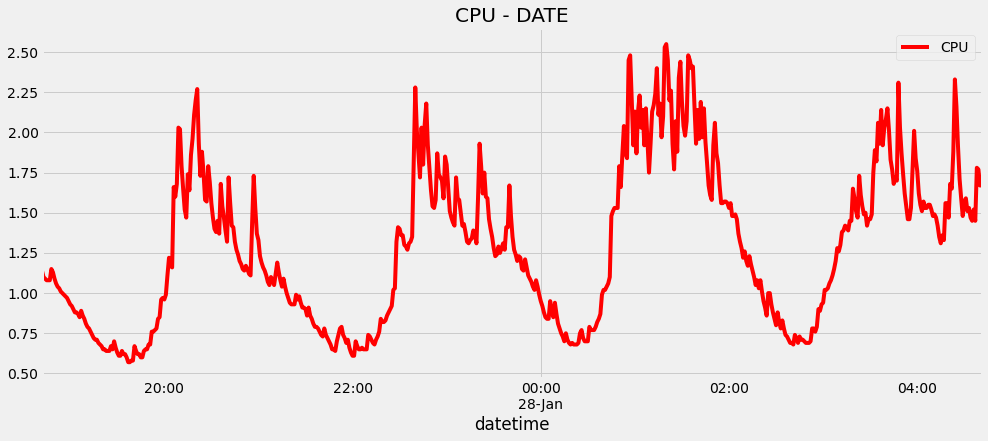

In [65]:
data_train_b.plot(title="CPU - DATE", figsize=(15,6),color='red')

In the time it si look like similar but in 28.1 you could see diferent movement.

In [71]:
#Load data train and test A
data_train_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-a.csv', parse_dates=[0], infer_datetime_format=True)
data_test_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-a.csv', parse_dates=[0], infer_datetime_format=True)


In [91]:
data_train_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-b.csv', parse_dates=[0], infer_datetime_format=True)
data_test_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-b.csv', parse_dates=[0], infer_datetime_format=True)

Text(0.5, 1.0, 'CPU Utilization train A')

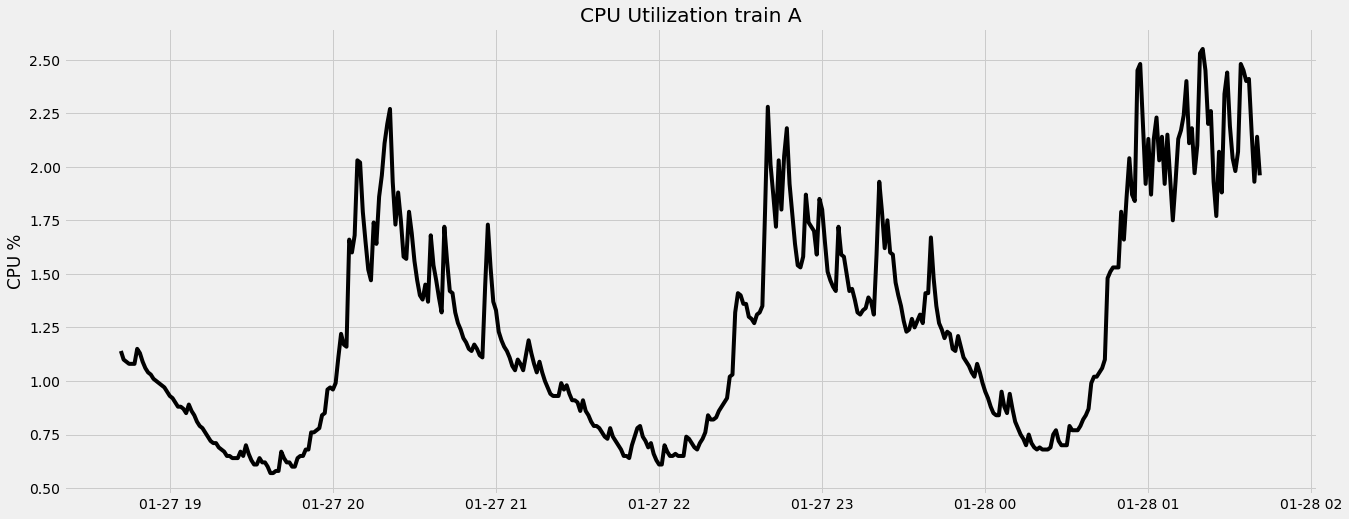

In [101]:
plt.figure(figsize=(20,8))
plt.plot(data_train_a['datetime'], data_train_a['cpu'], color='black')
plt.ylabel('CPU %')
plt.title('CPU Utilization train A')

Text(0.5, 1.0, 'CPU Utilization train B')

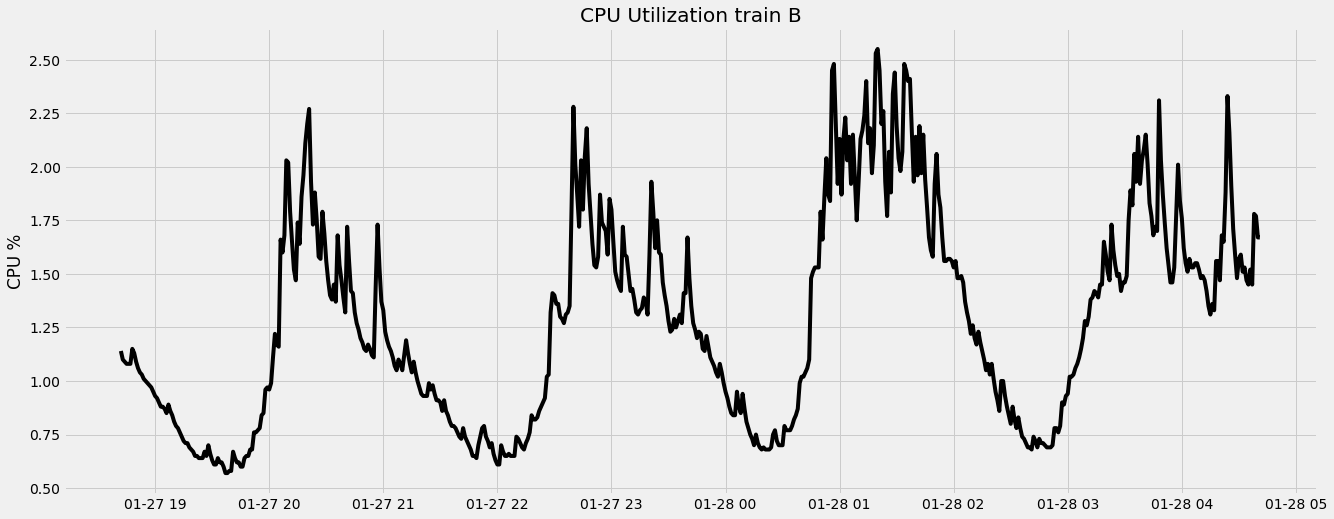

In [102]:
plt.figure(figsize=(20,8))
plt.plot(data_train_b['datetime'], data_train_b['cpu'], color='black')
plt.ylabel('CPU %')
plt.title('CPU Utilization train B')

As you can se in te compu A in 01-28-02 - 01.28.03 it is an increase. But in the compu B in the same period you anormal result.

Step 4:

Use the ARIMA model to fit the data.

In [109]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 33.9 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 43.8 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 81.8 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


CPU A

In [120]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(data_train_a, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.81 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-273.302, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-368.085, Time=0.41 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.78 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-271.465, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-417.827, Time=2.68 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=11.11 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=4.11 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-419.762, Time=1.99 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-369.850, Time=0.32 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=7.99 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=3.68 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-417.860, Time=1.91 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=-421.259, Time=2.99 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-373.

In [121]:
stepwise_model.fit(data_train_a)

ARIMA(order=(3, 1, 2), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

Step 5:

Evaluate the performance

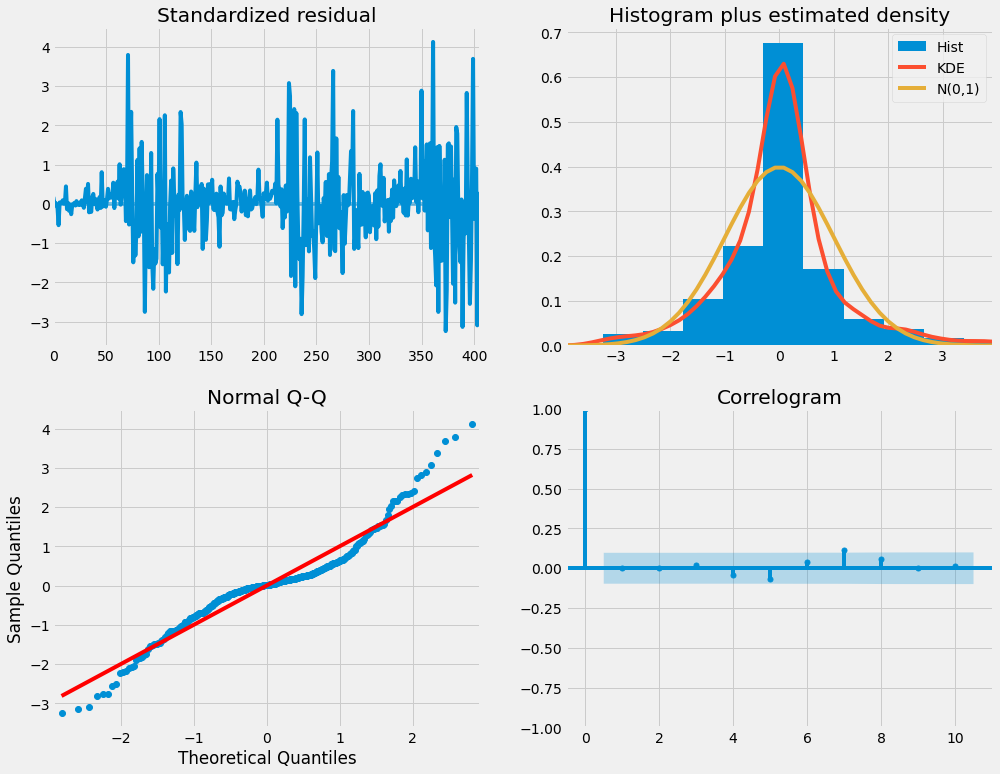

In [122]:
stepwise_model.fit(data_train_a).plot_diagnostics(figsize=(15, 12))
plt.show()

Step 6:

Run the actual prediction by using the most recent 100 observed data points being followed by the 60 predicted points.

In [123]:
future_forecast = stepwise_model.predict(n_periods=60)

<AxesSubplot:xlabel='datetime'>

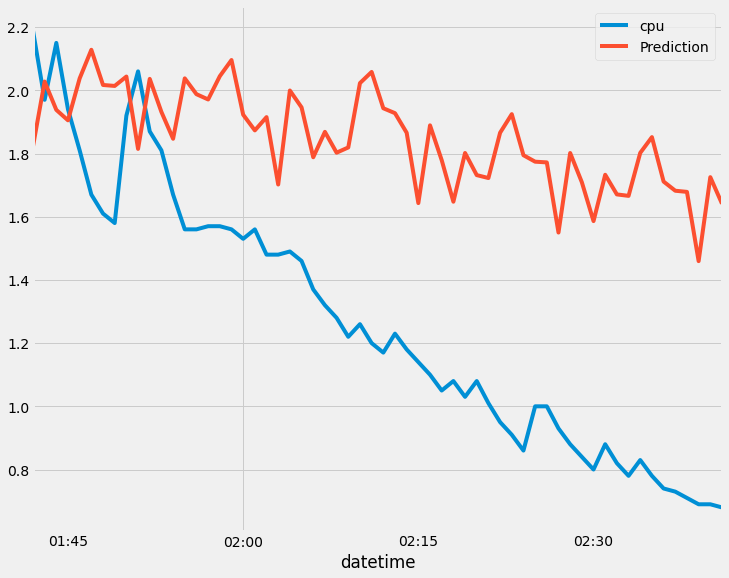

In [124]:
future_forecast = pd.DataFrame(future_forecast,index = data_test_a.index,columns=['Prediction'])
pd.concat([data_test_a,future_forecast],axis=1).plot()

CPU B

Step 7:

Let’s perform the same anomaly detection on another segment of the CPU utilization dataset captured at a different time by using the cpu-train-b

Can you visualize any anomaly that occurs a short time after the training period?

In [125]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(data_train_b, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=7.39 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-376.973, Time=0.13 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-540.238, Time=2.34 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=7.43 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-375.034, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-618.341, Time=4.47 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=19.61 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=6.31 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-619.706, Time=3.76 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-541.973, Time=0.32 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=13.71 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=3.58 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-618.493, Time=3.18 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=13.01 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=-617.729

In [126]:
stepwise_model.fit(data_train_b)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

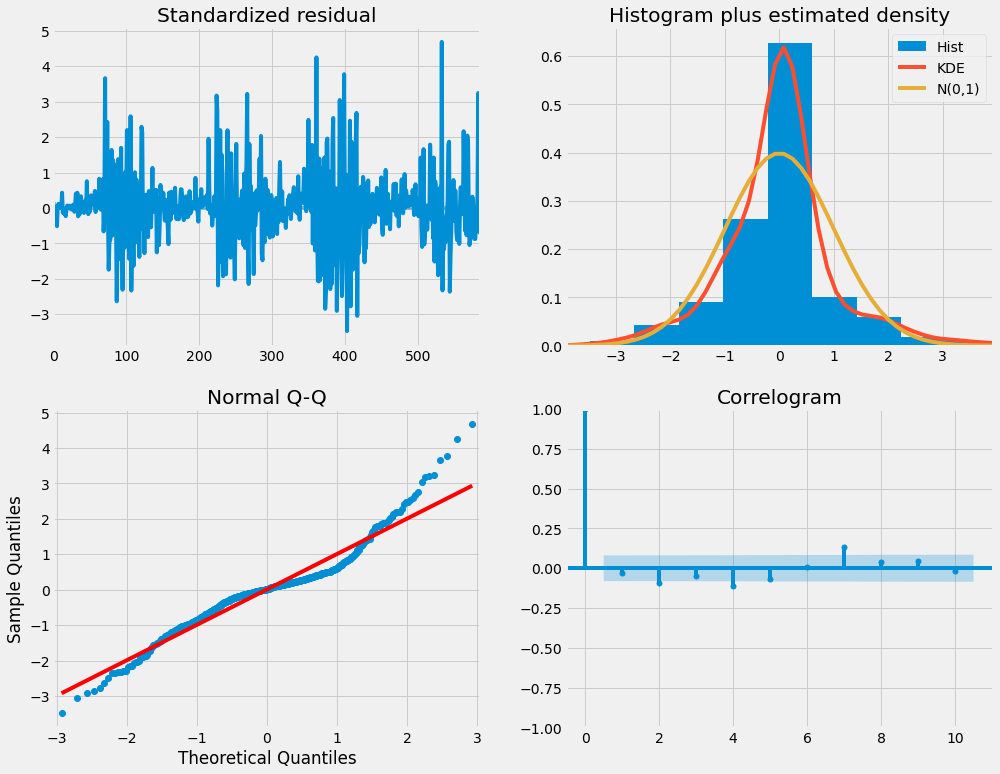

In [127]:
stepwise_model.fit(data_train_b).plot_diagnostics(figsize=(15, 12))
plt.show()

In [128]:
future_forecast = stepwise_model.predict(n_periods=60)

<AxesSubplot:xlabel='datetime'>

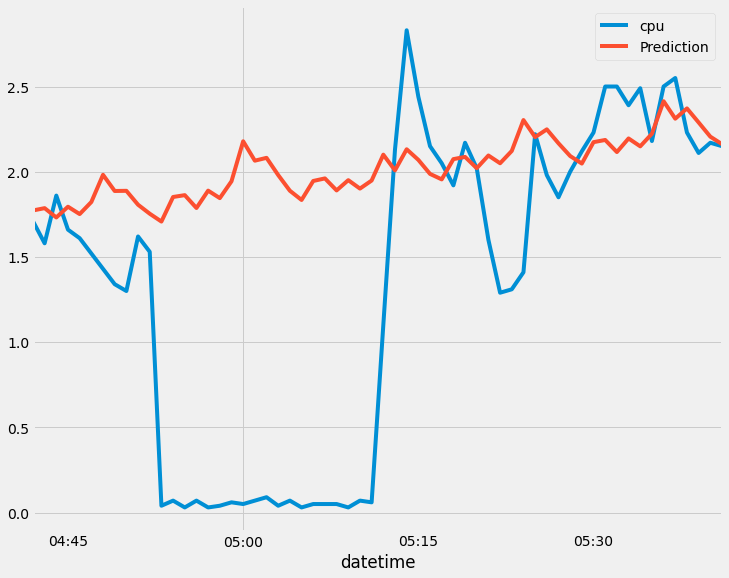

In [129]:
future_forecast = pd.DataFrame(future_forecast,index = data_test_b.index,columns=['Prediction'])
pd.concat([data_test_b,future_forecast],axis=1).plot()

Step 8:

Put your conclusions in the README file as a summary. And don't forget to create this model in your app.py file.

Finally, a plot is created comparing the actual vs. predicted values. In this case, we can see that the forecast is a good fit but have anormals in an specific period, taht we have to know the why of it. The model has skill and forecast that looks sensible.


Time serials

https://github.com/oreilly-mlsec/book-resources/blob/master/chapter3/arima-forecasting.ipynb
https://thecleverprogrammer.com/2020/08/04/arima-model-in-machine-learning/
https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/
https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/
